In [1]:
library(ggplot2)
library(dplyr)
library(patchwork)
library(stringr)
library(ggpubr)
R.utils::sourceDirectory('~/numbat/R')


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [17]:
M = list(
    'm1' = c(0,0,0,0, 1,1,1,1,1,1, 1,1,1,1),
    'm2' = c(0,0,0,0, 1,1,1,1,1,1, 1,1,1,1),
    'm3' = c(0,0,0,0, 1,1,1,1,1,1, 0,0,0,0),
    'm4' = c(0,0,0,0, 0,0,0,0,0,0, 1,1,1,1),
    'm5' = c(0,0,0,0, 0,0,0,0,0,0, 1,1,1,1)
)

add_noise = function(m) {
    ifelse(m == 1, m - rexp(n = length(m), rate = 1e1), m + rexp(n = length(m), rate = 1e1))
}

M = data.frame(M) %>% mutate(cell = 1:n()) %>%
    mutate(cell = factor(cell))

# M = M %>%
#     reshape2::melt(variable.name = 'cnv', id.var = 'cell', value.name = 'I') %>%
#     mutate(cell = factor(cell)) %>%
#     mutate(cnv = factor(cnv, rev(unique(cnv)))) %>%
#     mutate(p = add_noise(I))

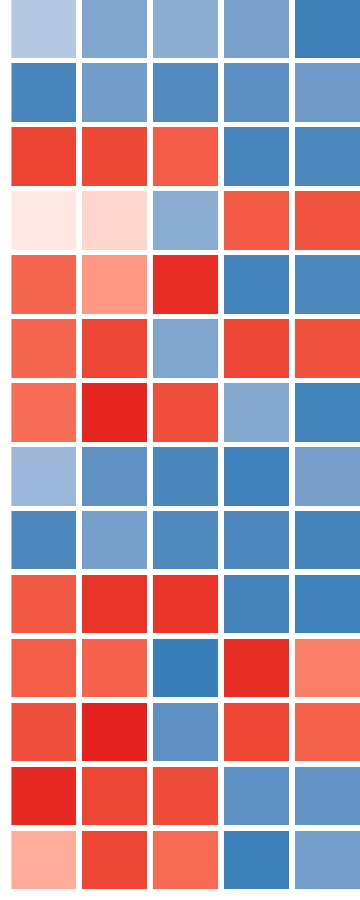

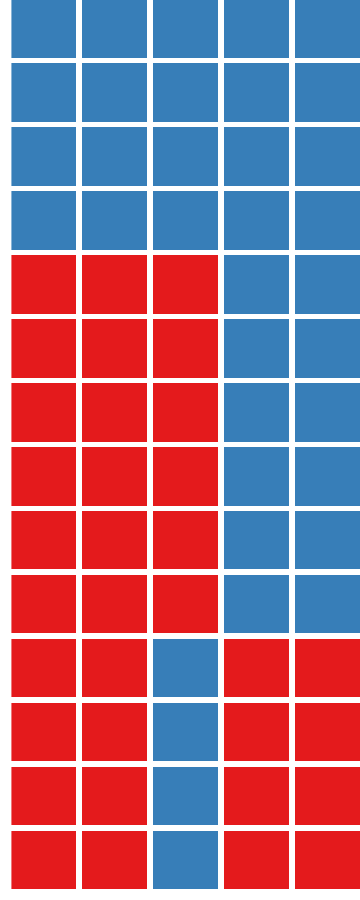

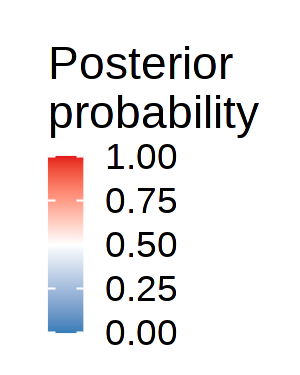

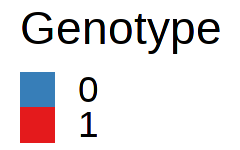

In [21]:
set.seed(0)

D = M %>%
    reshape2::melt(variable.name = 'cnv', id.var = 'cell', value.name = 'I') %>%
    mutate(cnv = factor(cnv, unique(cnv))) %>%
    mutate(p = add_noise(I))

pal = RColorBrewer::brewer.pal(n = 8, 'Set1')

p1 = ggplot(
    D %>% mutate(cell = factor(cell, sample(unique(cell)))),
    aes(x = cnv, y = cell, fill = p)
) +
geom_tile(width=0.9, height=0.9) +
theme_bw() +
scale_x_discrete(expand = expansion(0)) +
scale_y_discrete(expand = expansion(0)) +
scale_fill_gradient2(
    low = pal[2], high = pal[1], midpoint = 0.5, limits = c(0, 1), oob = scales::oob_squish
) +
theme(
    panel.spacing = unit(0.1, 'mm'),
    panel.border = element_blank(),
    panel.background = element_rect(fill = 'white'),
    strip.background = element_blank(),
    panel.grid = element_blank(),
    legend.key.size = unit(0.3, 'cm'),
    plot.margin = margin(0,0,0,0),
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.title = element_blank()
) +
guides(fill = guide_colorbar(title = 'Posterior\nprobability')) +
xlab('') +
ylab('')

p2 = ggplot(
    D,
    aes(x = cnv, y = rev(cell), fill = as.character(I))
) +
geom_tile(width=0.9, height=0.9) +
theme_bw() +
scale_x_discrete(expand = expansion(0)) +
scale_y_discrete(expand = expansion(0)) +
scale_fill_manual(values = c(pal[2], pal[1])) +
theme(
    panel.spacing = unit(0.1, 'mm'),
    panel.border = element_blank(),
    panel.background = element_rect(fill = 'white'),
    strip.background = element_blank(),
    plot.margin = margin(0,0,0,0),
    panel.grid = element_blank(),
    legend.key.size = unit(0.3, 'cm'),
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.ticks.x = element_blank(),
    axis.title = element_blank()
) +
guides(fill = guide_legend(title = 'Genotype')) +
xlab('') +
ylab('')

(p1 + guides(fill = 'none')) %>% 
do_plot('sc_schematic_1', 1.2, 3)

(p2 + guides(fill = 'none')) %>% 
do_plot('sc_schematic_2', 1.2, 3)


p1 %>% 
get_legend() %>%
as_ggplot() %>%
do_plot('sc_legend_1', 1, 1.25)

p2 %>% 
get_legend() %>%
as_ggplot() %>%
do_plot('sc_legend_2', 0.8, 0.5)

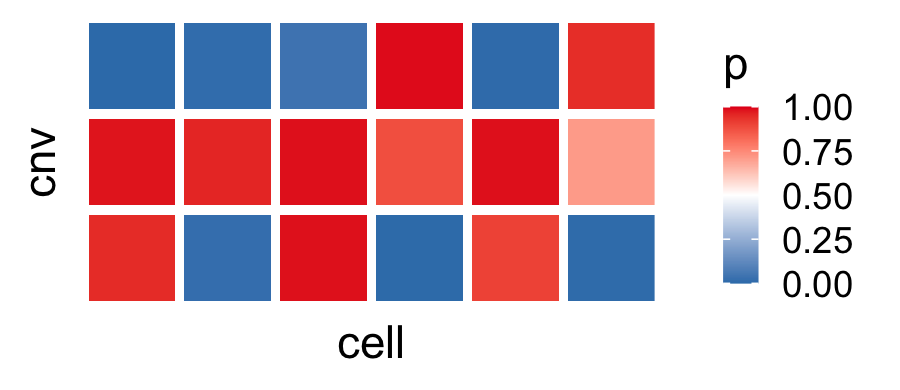

In [94]:
options(repr.plot.width = 3, repr.plot.height = 1.3, repr.plot.res = 300)
set.seed(0)

pal = RColorBrewer::brewer.pal(n = 8, 'Set1')

set.seed(1)

D %>%
mutate(cell = factor(cell, sample(unique(cell)))) %>%
mutate(cnv = factor(cnv, rev(sample(unique(cnv))))) %>%
ggplot(
    aes(x = cell, y = cnv, fill = p)
) +
geom_tile(width=0.9, height=0.9) +
theme_bw() +
scale_x_discrete(expand = expansion(0)) +
scale_y_discrete(expand = expansion(0)) +
scale_fill_gradient2(
    low = pal[2], high = pal[1], midpoint = 0.5,limits = c(0, 1),oob = scales::oob_squish) +
theme(
    panel.spacing = unit(0.1, 'mm'),
    panel.border = element_blank(),
    panel.background = element_rect(fill = 'white'),
    strip.background = element_blank(),
    panel.grid = element_blank(),
    legend.key.size = unit(0.3, 'cm'),
    axis.text.x = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank(),
    axis.ticks.x = element_blank()
)

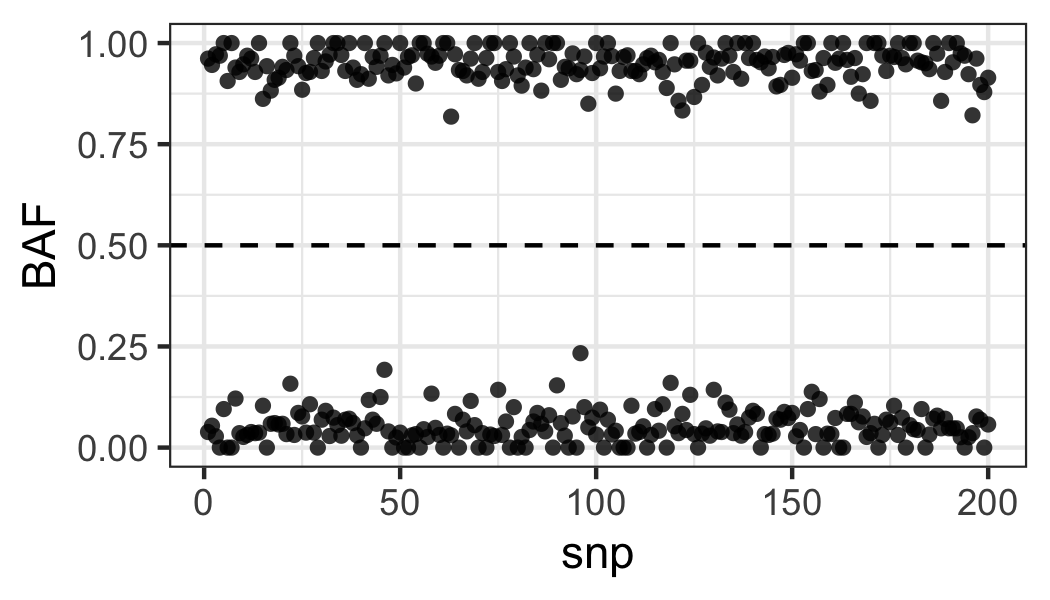

In [23]:
options(repr.plot.width = 3.5, repr.plot.height = 2, repr.plot.res = 300)

n = 200
d = 30
theta = 0.45
ps_u = c(rep(0.5 - theta, n * 0.3), rep(0.5 + theta, n * 0.5), rep(0.5 - theta, n * 0.2))
ps_d = c(rep(0.5 + theta, n * 0.3), rep(0.5 - theta, n * 0.5), rep(0.5 + theta, n * 0.2))

set.seed(1)

D = data.frame(
    snp = 1:n
) %>%
mutate(
    d = rpois(n = n, lambda = d),
    m = rbinom(n = n, size = d, prob = ps_u),
    p = rbinom(n = n, size = d, prob = ps_d),
) %>%
reshape2::melt(variable.name = 'haplo', id.var = c('snp', 'd'), value.name = 'count') 

p1 = ggplot(
    D,
    aes(x = snp, y = count/d)
) +
geom_point(pch = 16, alpha = 0.8) +
theme_bw() +
geom_hline(yintercept = 0.5, linetype = 'dashed') +
ylab('BAF') +
guides(color = 'none') +
ylim(0,1)

p1

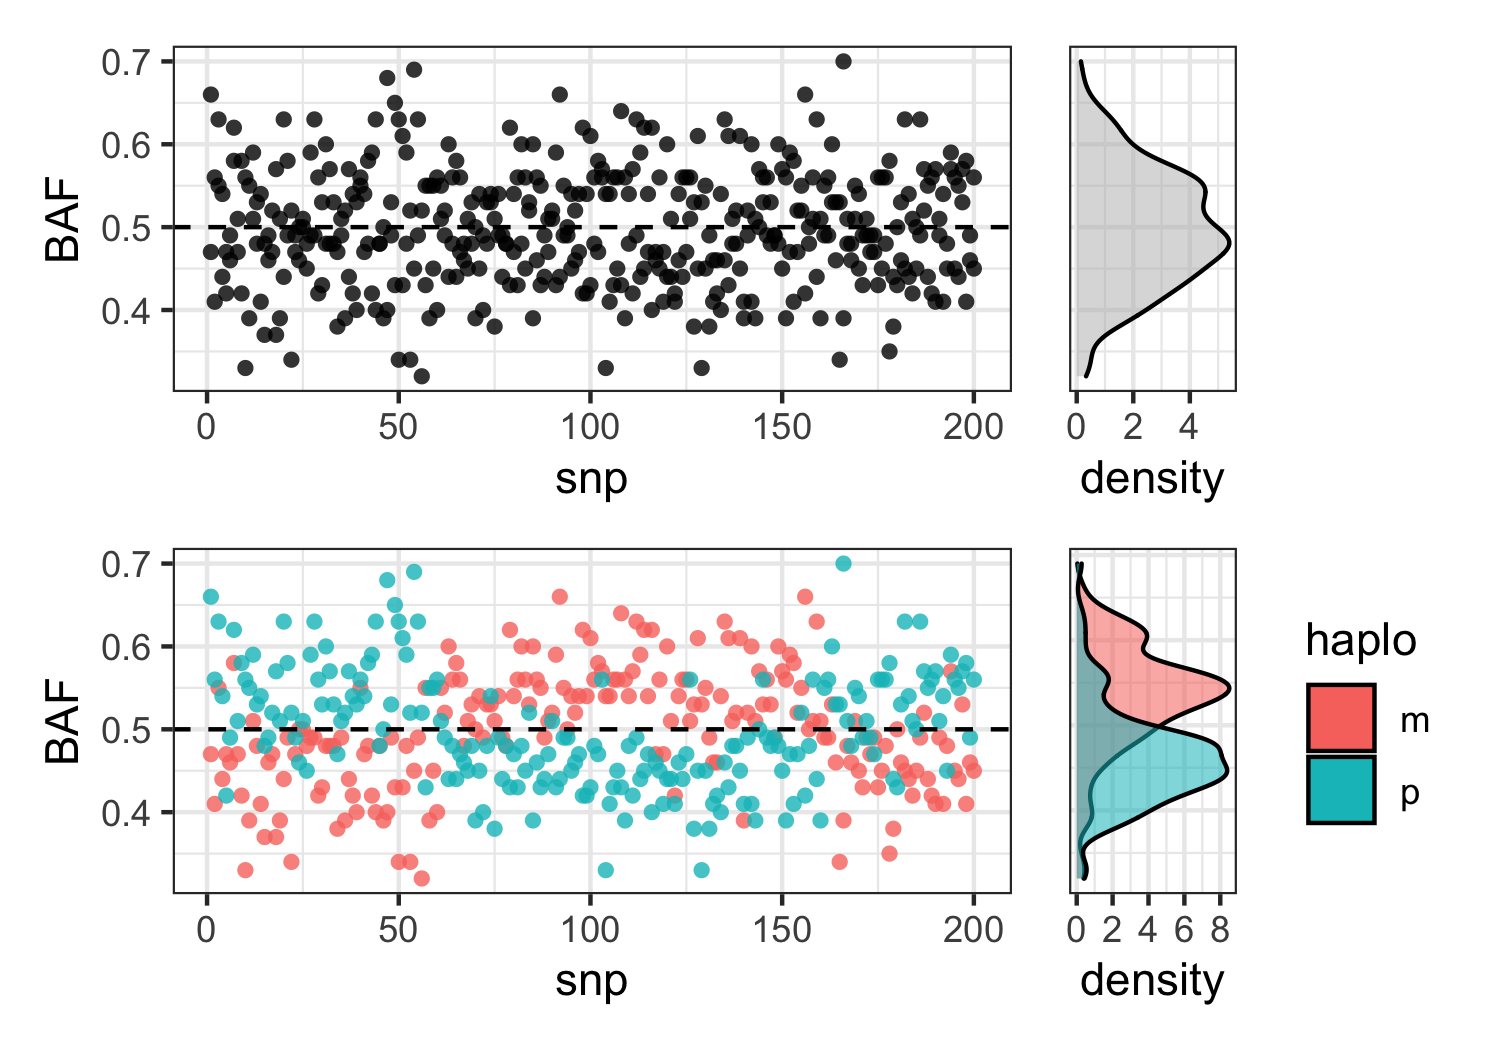

In [3]:
options(repr.plot.width = 5, repr.plot.height = 3.5, repr.plot.res = 300)

n = 200
d = 100
theta = 0.05
ps_u = c(rep(0.5 - theta, n * 0.3), rep(0.5 + theta, n * 0.5), rep(0.5 - theta, n * 0.2))
ps_d = c(rep(0.5 + theta, n * 0.3), rep(0.5 - theta, n * 0.5), rep(0.5 + theta, n * 0.2))

set.seed(1)
D = data.frame(
    m = rbinom(n = n, size = d, prob = ps_u),
    p = rbinom(n = n, size = d, prob = ps_d),
    snp = 1:n
) %>%
reshape2::melt(variable.name = 'haplo', id.var = 'snp', value.name = 'count') 


p1 = ggplot(
    D,
    aes(x = snp, y = count/d)
) +
geom_point(pch = 16, alpha = 0.8) +
theme_bw() +
geom_hline(yintercept = 0.5, linetype = 'dashed') +
ylab('BAF') +
guides(color = 'none')

p2 = ggplot(
    D,
    aes(x = count/d, alpha = 0.5)
) +
geom_density(fill = 'gray') +
coord_flip() +
theme_bw() +
theme(
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank()
) +
guides(alpha = 'none')

p3 = ggplot(
    D,
    aes(x = snp, y = count/d, color = haplo)
) +
geom_point(pch = 16, alpha = 0.8) +
theme_bw() +
geom_hline(yintercept = 0.5, linetype = 'dashed') +
ylab('BAF') +
guides(color = 'none')

p4 = ggplot(
    D %>% filter(snp > 50 & snp < 150),
    aes(x = count/d, fill = haplo, alpha = 0.5)
) +
geom_density() +
coord_flip() +
theme_bw() +
theme(
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),
    axis.ticks.y = element_blank()
) +
guides(alpha = 'none')

(((p1 | p2) + plot_layout(widths = c(5,1)))/((p3 | p4) + plot_layout(widths = c(5,1)))) 

In [25]:
library(RColorBrewer)

In [10]:
remove.packages('ragg')

Removing package from ‘/home/tenggao/R/x86_64-pc-linux-gnu-library/4.1’
(as ‘lib’ is unspecified)



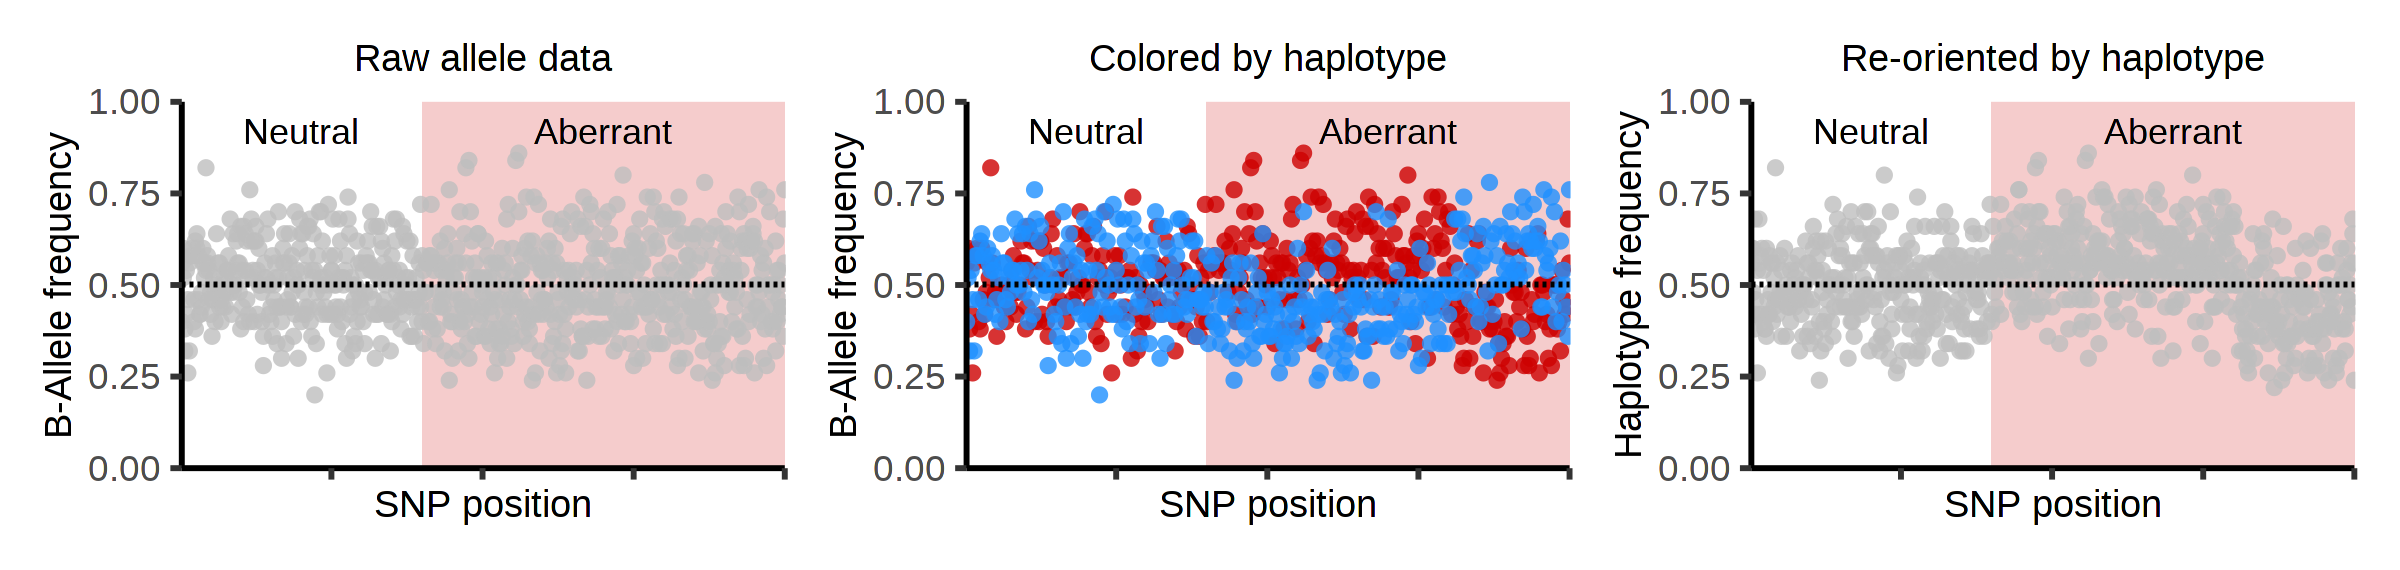

In [18]:
n = 400
d = 50
theta = 0.06
size = 1.5
ps_u = c(rep(0.5, n * 0.4), rep(0.5 + theta, n * 0.4), rep(0.5 - theta, n * 0.2))
ps_d = c(rep(0.5, n * 0.4), rep(0.5 - theta, n * 0.4), rep(0.5 + theta, n * 0.2))

segs = data.frame(
        xmin = c(n * 0, n * 0.4),
        xmax = c(n * 0.4, n),
        state = c('neutral', 'aberrant')
    )

set.seed(0)

D = data.frame(
    m = rbinom(n = n, size = rpois(n = n, lambda = d), prob = ps_u),
    p = rbinom(n = n, size = rpois(n = n, lambda = d), prob = ps_d),
    snp = 1:n
) %>%
reshape2::melt(variable.name = 'haplo', id.var = 'snp', value.name = 'count') 

p1 = ggplot(
    D,
    aes(x = snp, y = count/d)
) +
annotate("rect", xmin = n*0.4, xmax = n, ymin = 0, ymax = 1, alpha=0.2, fill = "red3") +
geom_point(pch = 16, alpha = 0.8, size = size, color = 'gray') +
# geom_linerange(
#     data = segs,
#     inherit.aes = F,
#     aes(xmin = xmin, xmax = xmax, y = 0.95, color = state),
#     size = 2
# ) +
geom_text(
    data = segs,
    inherit.aes = F,
    aes(x = (xmin+xmax)/2, y =  0.85, label = stringr::str_to_title(state)),
    vjust = -0.5,
    size = 3,
) +
theme_classic() +
geom_hline(yintercept = 0.5, linetype = 'dashed') +
ylab('B-Allele frequency') +
xlab('SNP position') +
scale_color_manual(values = c('neutral' = 'gray', 'aberrant' = 'red3', 'm' = 'darkorange', 'p' = 'skyblue')) +
guides(color = 'none') +
scale_y_continuous(expand = expansion(0), limits = c(0,1)) +
scale_x_continuous(expand = expansion(0)) +
ggtitle('Raw allele data') +
theme(
    plot.title = element_text(size = 9, hjust = 0.5),
    axis.title = element_text(size = 9, hjust = 0.5),
    axis.text.x = element_blank()
)

p2 = ggplot(
    D,
    aes(x = snp, y = count/d, color = haplo)
) +
annotate("rect", xmin = n*0.4, xmax = n, ymin = 0, ymax = 1, alpha=0.2, fill = "red3") +
geom_point(pch = 16, alpha = 0.8, size = size) +
# geom_linerange(
#     data = segs,
#     inherit.aes = F,
#     aes(xmin = xmin, xmax = xmax, y = 0.95, color = state),
#     size = 2
# ) +
geom_text(
    data = segs,
    inherit.aes = F,
    aes(x = (xmin+xmax)/2, y = 0.85, label = stringr::str_to_title(state)),
    vjust = -0.5,
    size = 3,
) +
theme_classic() +
geom_hline(yintercept = 0.5, linetype = 'dashed') +
ylab('B-Allele frequency') +
xlab('SNP position') +
guides(color = guide_legend(color = '')) +
theme(legend.position = 'none') +
scale_color_manual(values = c('m' = 'red3', 'p' = 'dodgerblue')) +
scale_y_continuous(expand = expansion(0), limits = c(0,1)) +
scale_x_continuous(expand = expansion(0)) +
ggtitle('Colored by haplotype') +
theme(
    plot.title = element_text(size = 9, hjust = 0.5),
    axis.title = element_text(size = 9, hjust = 0.5),
    axis.text.x = element_blank()
)

p3 = ggplot(
    D,
    aes(x = snp, y = ifelse(haplo == 'm', count/d, 1-count/d))
) +
annotate("rect", xmin = n*0.4, xmax = n, ymin = 0, ymax = 1, alpha=0.2, fill = "red3") +
geom_point(pch = 16, alpha = 0.8, size = size, color = 'gray') +
# geom_linerange(
#     data = segs,
#     inherit.aes = F,
#     aes(xmin = xmin, xmax = xmax, y = 0.95, color = state),
#     size = 2
# ) +
geom_text(
    data = segs,
    inherit.aes = F,
    aes(x = (xmin+xmax)/2, y = 0.85, label = stringr::str_to_title(state)),
    vjust = -0.5,
    size = 3,
) +
theme_classic() +
geom_hline(yintercept = 0.5, linetype = 'dashed') +
scale_color_manual(values = c('neutral' = 'gray', 'aberrant' = 'red3', 'm' = 'darkorange', 'p' = 'skyblue')) +
ylab('Haplotype frequency') +
xlab('SNP position') +
guides(color = 'none') +
scale_y_continuous(expand = expansion(0), limits = c(0,1)) +
scale_x_continuous(expand = expansion(0)) +
ggtitle('Re-oriented by haplotype') +
theme(
    plot.title = element_text(size = 9, hjust = 0.5),
    axis.title = element_text(size = 9, hjust = 0.5),
    axis.text.x = element_blank()
)


panel = (p1 | p2 | p3)

do_plot(panel, 'phasing_schematic', 8, 1.9)

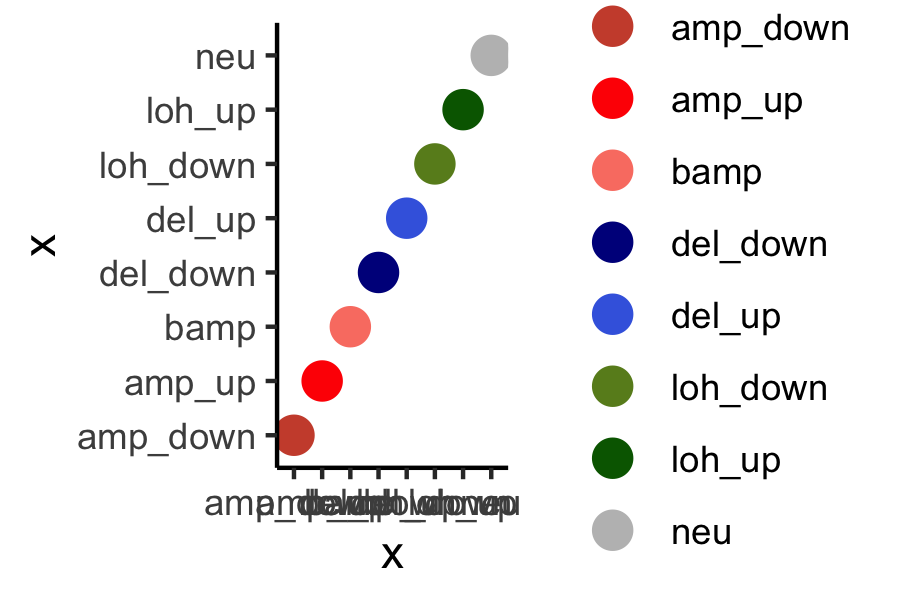

In [190]:
options(repr.plot.width = 3, repr.plot.height = 2, repr.plot.res = 300)

cnv_colors_lite = c("neu" = "gray",
        "del_up" = "royalblue", "del_down" = "darkblue", 
        "loh_up" = "darkgreen", "loh_down" = "olivedrab4",
        "amp_up" = "red", "amp_down" = "tomato3", "bamp" = "salmon")

ggplot(
    data.frame(x = names(cnv_colors_lite)),
    aes(x = x, y = x, color = x)
) + scale_color_manual(
    values = cnv_colors_lite
) +
geom_point(size = 4) +
theme_classic() +
guides(color = guide_legend(title = 'cnv_states'), override.aes = list(size = 3)) 

In [191]:
library(ape)

In [203]:
write.tree(tree, file = "~/test.tree")

In [50]:
library(extraDistr)

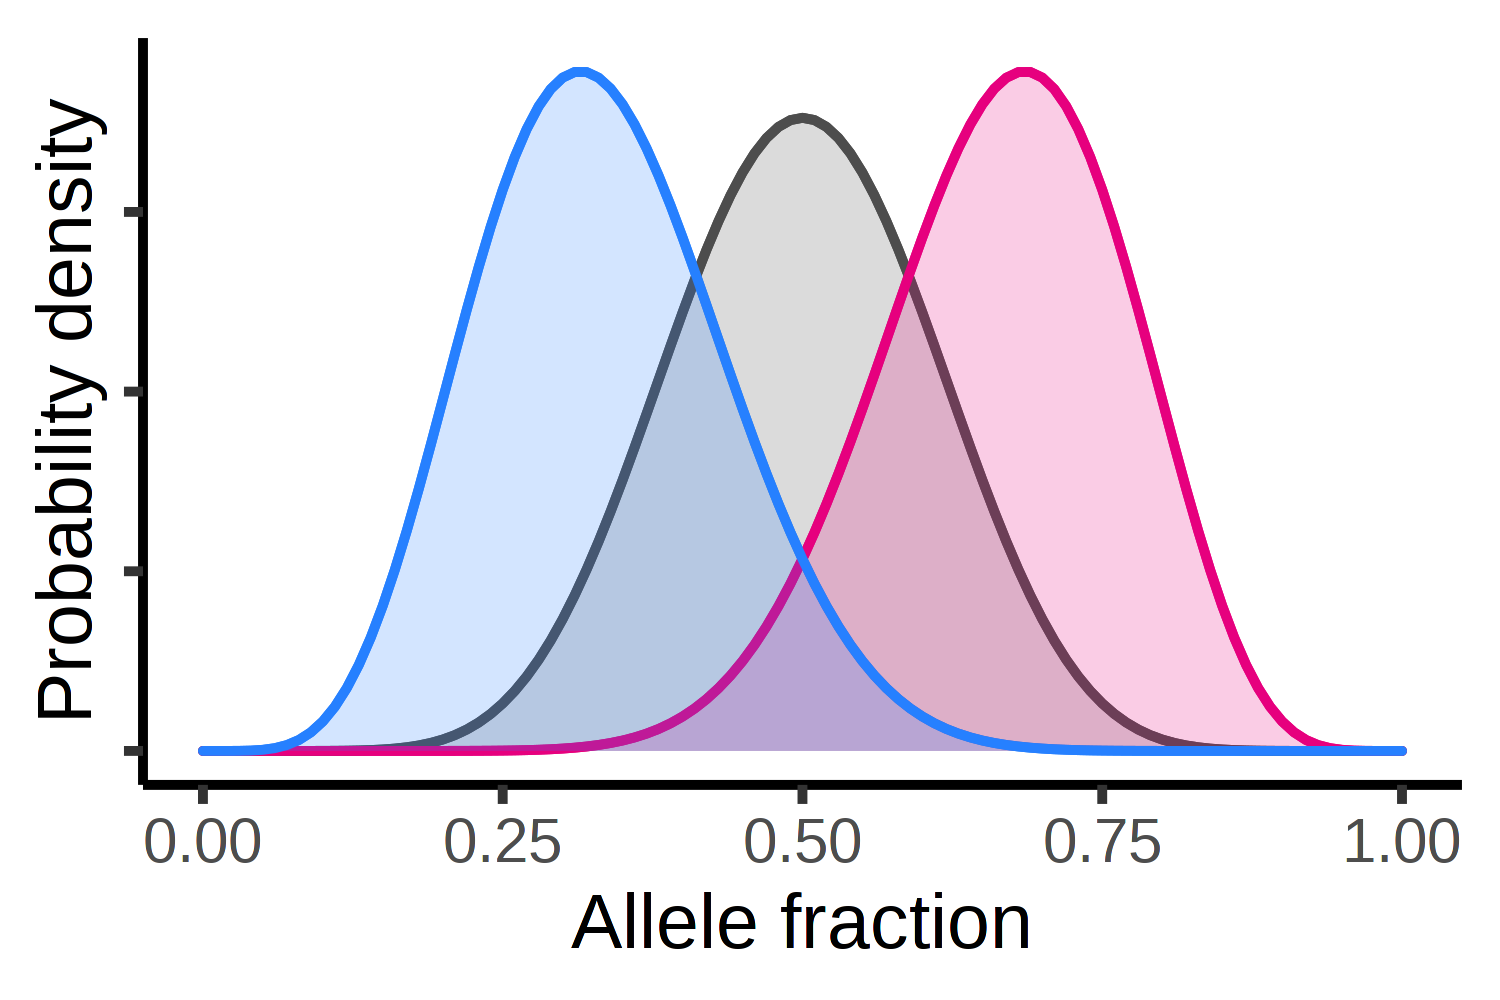

In [9]:
options(repr.plot.width = 3, repr.plot.height = 2, repr.plot.res = 500)

gamma = 20

data.frame(
    x = seq(0,1,0.01)
) %>%
mutate(
    p_x_neu = dbeta(x, shape1 = gamma * 0.5, shape2 = gamma * 0.5),
    p_x_del = dbeta(x, shape1 = gamma * 2/3, shape2 = gamma * 1/3),
    p_x_amp = dbeta(x, shape1 = gamma * 1/3, shape2 = gamma * 2/3)
) %>%
reshape2::melt(measure.vars = c('p_x_neu', 'p_x_del', 'p_x_amp'), value.name = 'p_x', variable.name = 'state') %>%
ggplot(
    aes(x = x, y = p_x, color = state)
) +
theme_classic() +
geom_line() +
geom_area(aes(y = p_x, fill = state), position = "identity", alpha = 0.2) +
theme(
    axis.text.y = element_blank()
) +
scale_color_manual(values = c('gray30', '#e6007e', '#2680ff')) +
scale_fill_manual(values = c('gray30', '#e6007e', '#2680ff')) +
xlab('Allele fraction') +
ylab('Probability density') +
guides(color = 'none', fill = 'none')

In [5]:
library(numbat)

Registered S3 method overwritten by 'ggtree':
  method      from 
  identify.gg ggfun

Warning message:
“replacing previous import ‘Matrix::expand’ by ‘ggtree::expand’ when loading ‘numbat’”

Attaching package: ‘numbat’


The following objects are masked _by_ ‘.GlobalEnv’:

    aggregate_counts, analyze_bulk, detect_clonal_loh, get_bulk,
    Numbat, plot_bulks, plot_consensus, plot_exp_roll,
    plot_mut_history, plot_phylo_heatmap, plot_psbulk, plot_sc_tree,
    run_numbat




Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



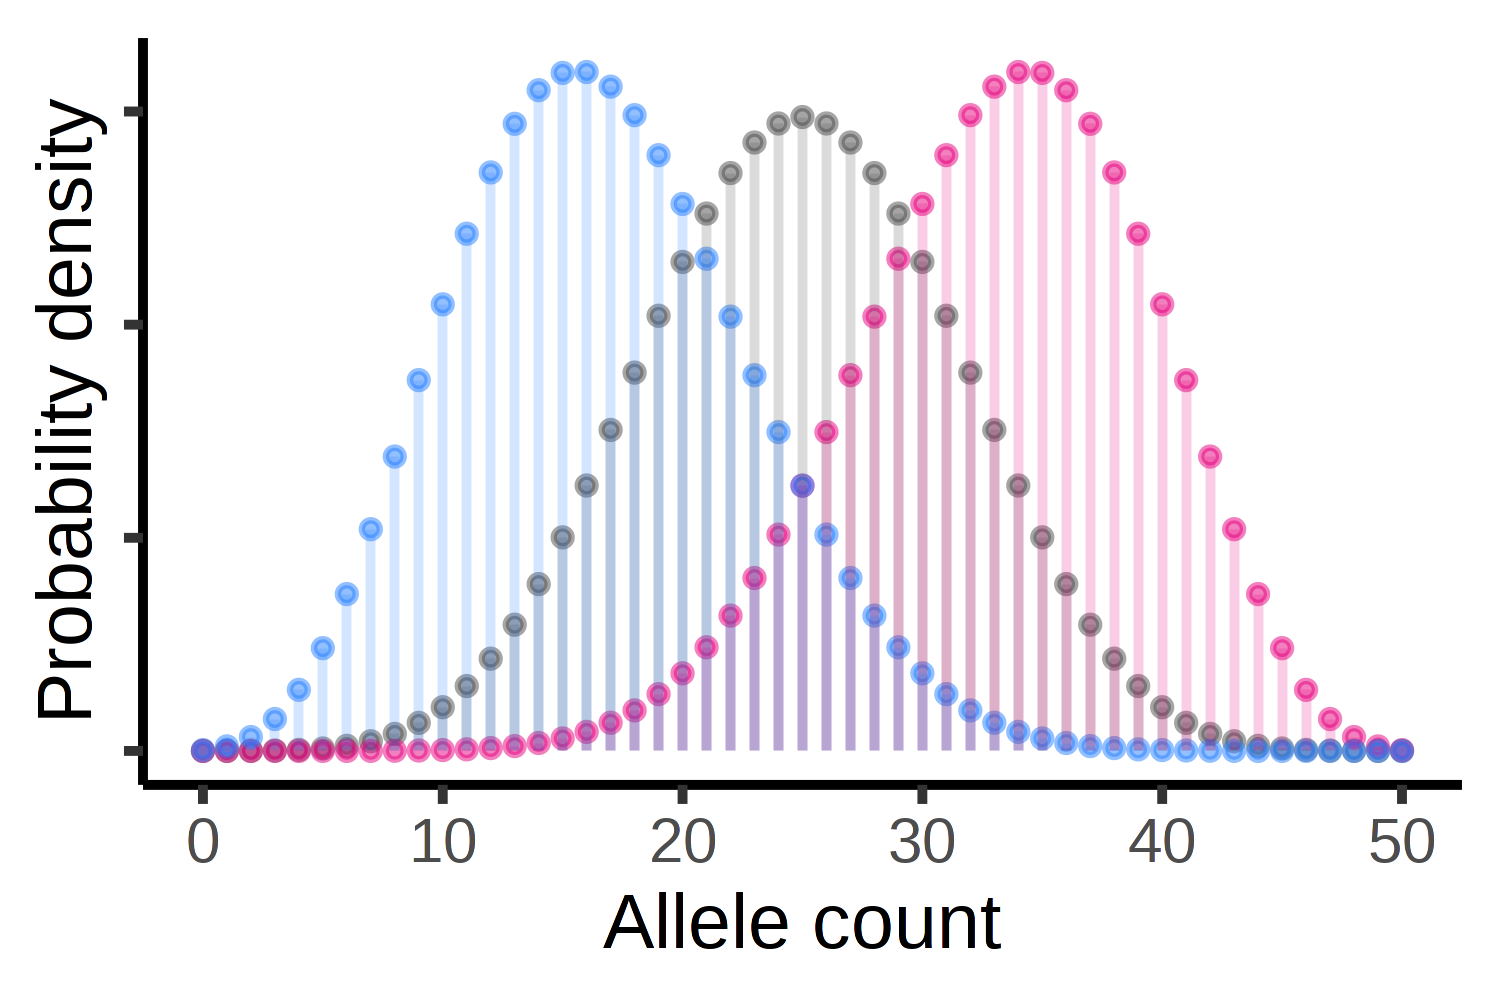

In [8]:
options(repr.plot.width = 3, repr.plot.height = 2, repr.plot.res = 500)

gamma = 20
d = 50
data.frame(
    x = seq(0,d,1)
) %>%
mutate(
    p_x_neu = dbbinom(x, size = d, alpha = gamma * 0.5, beta = gamma * 0.5),
    p_x_amp = dbbinom(x, size = d, alpha = gamma * 1/3, beta = gamma * 2/3),
    p_x_del = dbbinom(x, size = d, alpha = gamma * 2/3, beta = gamma * 1/3),
) %>%
reshape2::melt(measure.vars = c('p_x_neu', 'p_x_del', 'p_x_amp'), value.name = 'p_x', variable.name = 'state') %>%
ggplot(
    aes(x = x, y = p_x, color = state)
) +
theme_classic() +
geom_point(size = 0.8, alpha = 0.5) +
geom_segment(aes(x = x, xend = x, y = 0, yend = p_x), size = 0.5, alpha = 0.2) +
theme(
    axis.text.y = element_blank()
) +
scale_color_manual(values = c('gray30', '#e6007e', '#2680ff')) +
scale_color_manual(values = c('gray30', '#e6007e', '#2680ff')) +
xlab('Allele count') +
ylab('Probability density') +
guides(color = 'none', fill = 'none') 

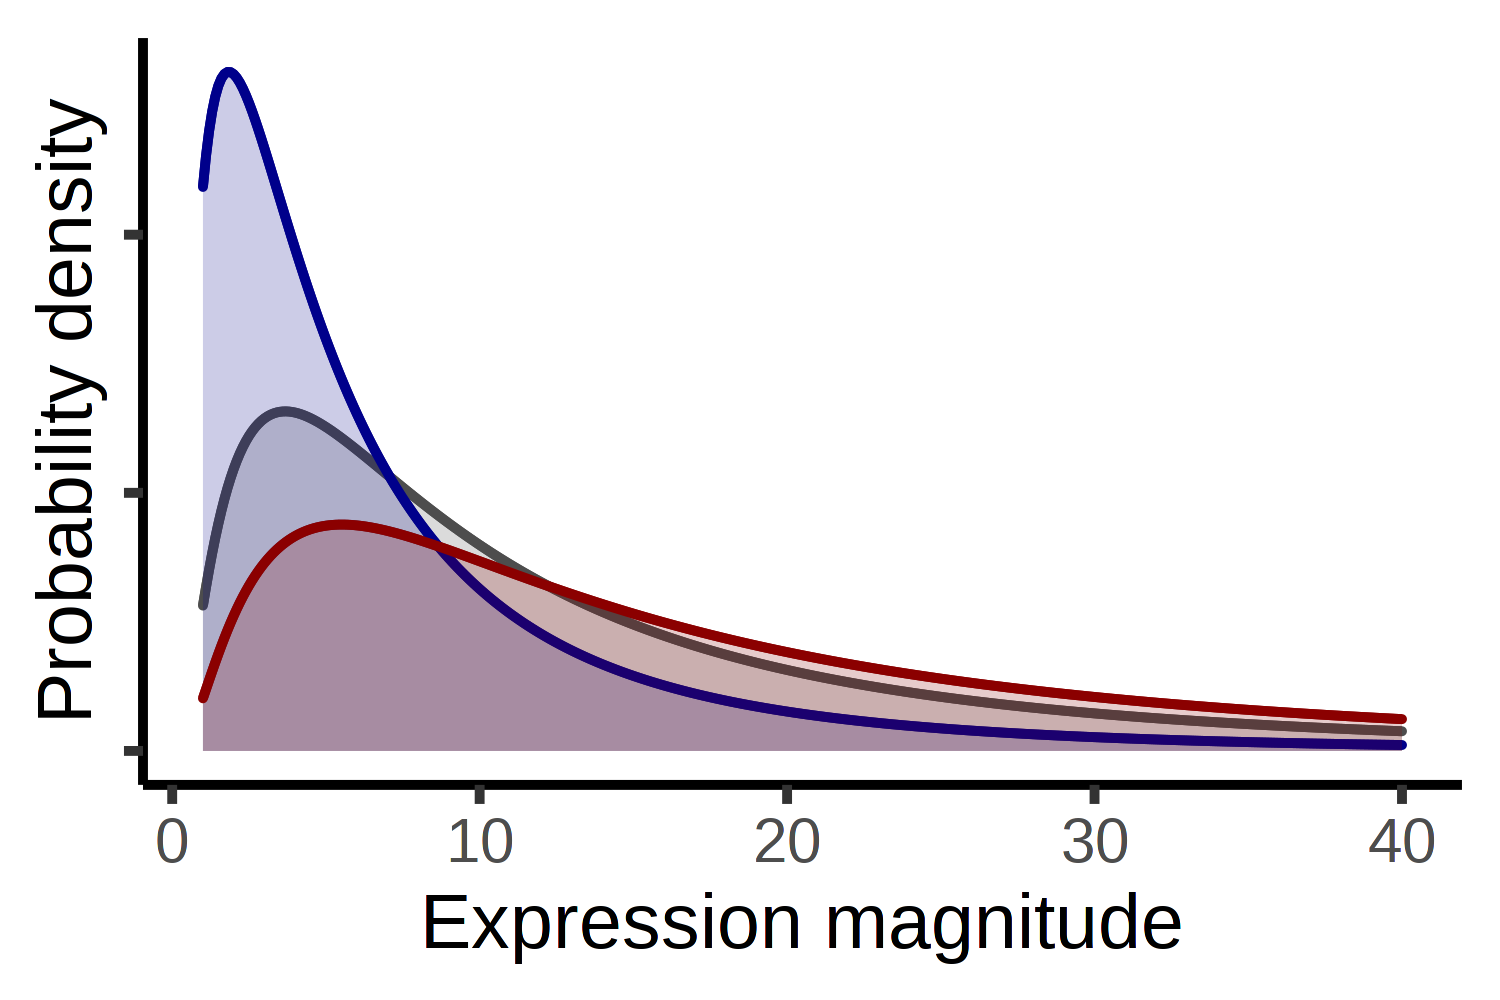

In [14]:
options(repr.plot.width = 3, repr.plot.height = 2, repr.plot.res = 500)

mu = 0
lambda_star = 1e-3
d = 1e4
sig = 1

data.frame(
    x = seq(1,40,0.1)
) %>%
rowwise() %>%
mutate(
    p_x_neu = dlnorm(x, meanlog = mu + log(1 * d * lambda_star), sdlog = sig),
    p_x_del = dlnorm(x, meanlog = mu + log(0.5 * d * lambda_star), sdlog = sig),
    p_x_amp = dlnorm(x, meanlog = mu + log(1.5 * d * lambda_star), sdlog = sig)
) %>%
reshape2::melt(measure.vars = c('p_x_neu', 'p_x_del', 'p_x_amp'), value.name = 'p_x', variable.name = 'state') %>%
ggplot(
    aes(x = x, y = p_x, color = state)
) +
theme_classic() +
geom_line() +
geom_area(aes(y = p_x, fill = state), position = "identity", alpha = 0.2) +
theme(
    axis.text.y = element_blank()
) +
scale_color_manual(values = c('gray30', 'darkblue', 'darkred')) +
scale_fill_manual(values = c('gray30', 'darkblue', 'darkred')) +
xlab('Expression magnitude') +
ylab('Probability density') +
guides(color = 'none', fill = 'none') 

In [24]:
library(poilog)

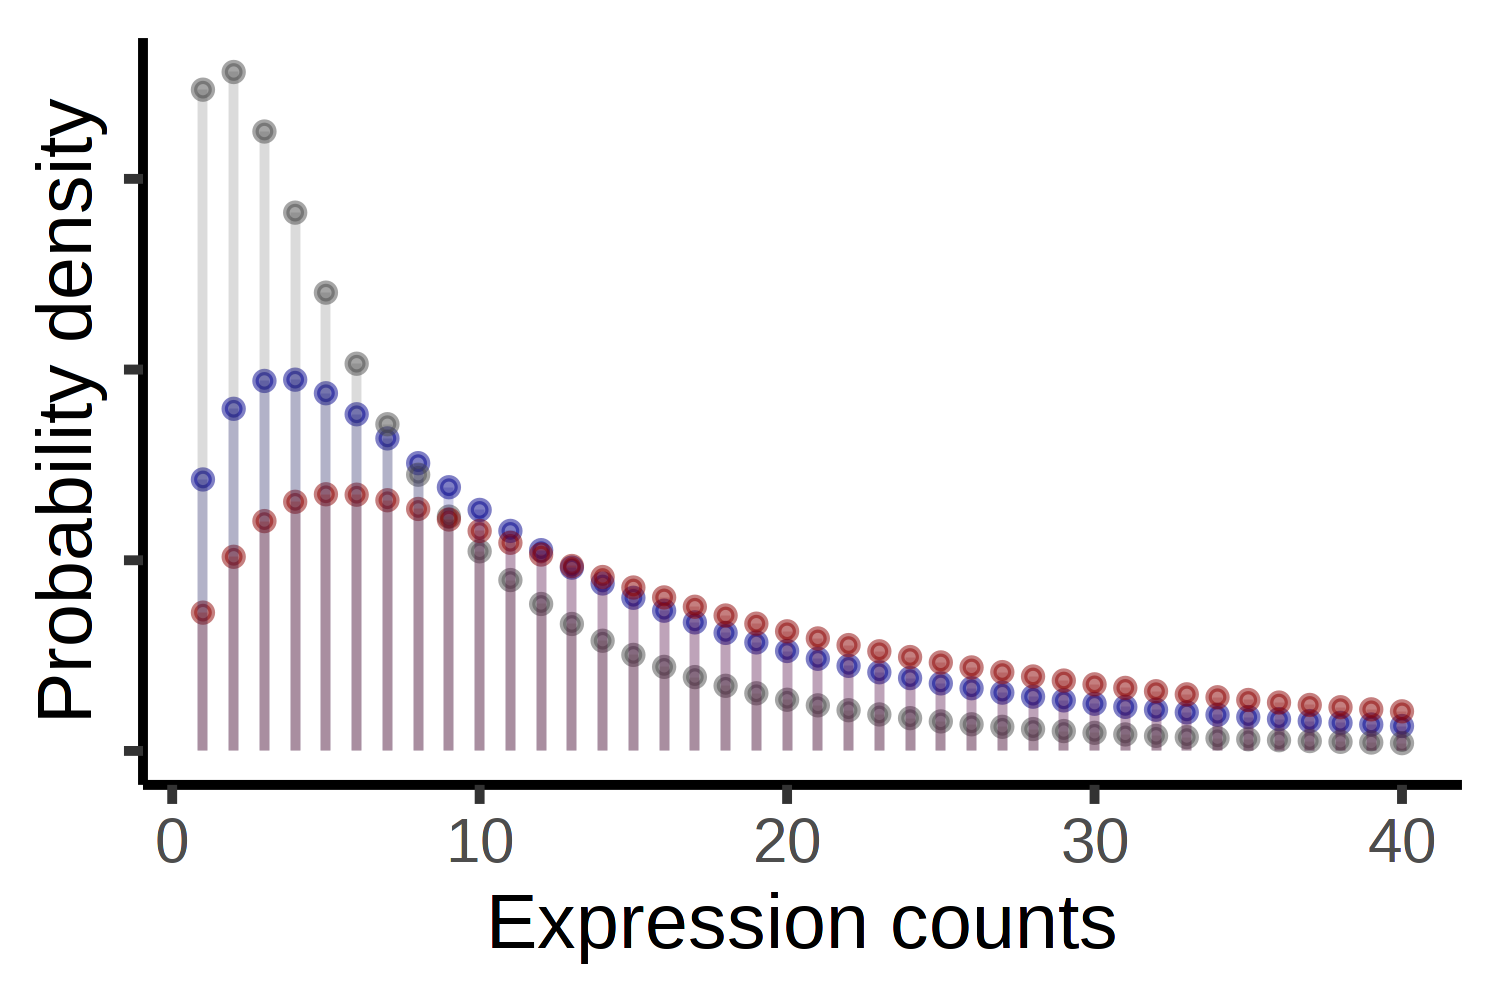

In [15]:
options(repr.plot.width = 3, repr.plot.height = 2, repr.plot.res = 500)

mu = 0
lambda_star = 1e-3
d = 1e4
sig = 1

data.frame(
    x = seq(1,40,1)
) %>%
rowwise() %>%
mutate(
    p_x_neu = dpoilog(x, mu = mu + log(1 * d * lambda_star), sig = sig),
    p_x_del = dpoilog(x, mu = mu + log(0.5 * d * lambda_star), sig = sig),
    p_x_amp = dpoilog(x, mu = mu + log(1.5 * d * lambda_star), sig = sig)
) %>%
reshape2::melt(measure.vars = c('p_x_neu', 'p_x_del', 'p_x_amp'), value.name = 'p_x', variable.name = 'state') %>%
ggplot(
    aes(x = x, y = p_x, color = state)
) +
theme_classic() +
# geom_col() +
geom_point(size = 0.8, alpha = 0.5) +
geom_segment(aes(x = x, xend = x, y = 0, yend = p_x), size = 0.5, alpha = 0.2) +
theme(
    axis.text.y = element_blank()
) +
scale_color_manual(values = c('darkblue', 'gray30', 'darkred')) +
xlab('Expression counts') +
ylab('Probability density') +
guides(color = 'none')

In [ ]:
options(repr.plot.width = 3, repr.plot.height = 2, repr.plot.res = 300)

data.frame(
    x = seq(1,50,1)
) %>%
rowwise() %>%
mutate(
    p_x_neu = beta(x, mu = mu + log(1 * d * lambda_star), sig = sig),
    p_x_del = dpoilog(x, mu = mu + log(0.5 * d * lambda_star), sig = sig),
    p_x_amp = dpoilog(x, mu = mu + log(1.5 * d * lambda_star), sig = sig)
) %>%
reshape2::melt(measure.vars = c('p_x_neu', 'p_x_del', 'p_x_amp'), value.name = 'p_x', variable.name = 'state') %>%
ggplot(
    aes(x = x, y = p_x, color = state)
) +
theme_classic() +
# geom_col() +
geom_point(size = 0.5) +
geom_segment(aes(x = x, xend = x, y = 0, yend = p_x), size = 0.5, alpha = 0.2) +
theme(
    axis.text.y = element_blank()
) +
xlab('counts') +
ylab('probability') +
guides(color = 'none')